# CHAPTER 5 - QAOA: Quantum Approximate Optimization Algorithm - Qiskit Code



*Note*: You may skip the following three cells if you have alredy installed the right versions of all the libraries mentioned in *Appendix D*. This will likely NOT be the case if you are running this notebook on a cloud service such as Google Colab.

In [ ]:
pip install qiskit==0.39.2

In [ ]:
pip install pylatexenc==2.10

In [ ]:
pip install qiskit-optimization==0.4.0

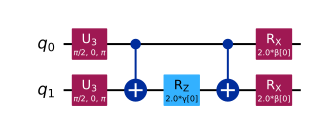

In [194]:
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit_algorithms import QAOA
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
#from qiskit import Aer /# depreciado
from qiskit.providers.basic_provider import BasicProvider
from qiskit.primitives import Sampler
from qiskit.circuit.library import QAOAAnsatz


seed = algorithm_globals.random_seed = 1234
#H1 = Z^Z # Define Z_0Z_1 # depreciado
H1 = Pauli('ZZ') # Define Z_0Z_1

#SparsePauliOp("ZI")

#optimizer = COBYLA()
#sampler = Sampler()
#qaoa = QAOA(sampler, optimizer)

ansatz = QAOAAnsatz(H1) # uma camada p=1

ansatz.decompose().decompose().decompose().draw("mpl",style="iqp")
#ansatz.decompose().draw(output="mpl")

#value_circuit = qaoa.compute_minimum_eigenvalue(H1) ## Calcula a minimizacao 
#print(value_circuit)

#circuit.draw(output="mpl")

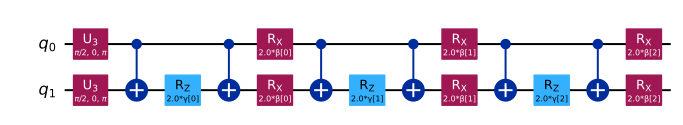

In [195]:
ansatz = QAOAAnsatz(H1,reps=3) # 3 camadas p=3
ansatz.decompose().decompose().decompose().draw("mpl")

In [174]:
#qaoa = QAOA(reps = 2) # depreciado
#circuit = qaoa.construct_circuit([1,2,3,4],H1)[0] # depreciado
#circuit.decompose().decompose().draw(output="mpl") # depreciado

In [200]:
#seed = 1234
#algorithm_globals.random_seed = seed
#quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"), 
#                   seed_simulator=seed, seed_transpiler=seed, 
#                   shots = 10)
#qaoa = QAOA(optimizer = COBYLA(), quantum_instance=quantum_instance)
#result = qaoa.compute_minimum_eigenvalue(H1)
#print(result)

optimizer = COBYLA()
sampler = Sampler()
# Iniciando os parametros β e γ com [1,2,3,4]
# β1 = 1, β2 = 2, γ1 = 3, and γ2 = 4
qaoa = QAOA(sampler, optimizer, reps=2,  initial_point=[1,2,3,4])

value_circuit = qaoa.compute_minimum_eigenvalue(H1) ## Calcula a minimizacao 
print(value_circuit)

{   'aux_operators_evaluated': None,
    'best_measurement': {   'bitstring': '01',
                            'probability': 0.4999999941132598,
                            'state': 1,
                            'value': (-1+0j)},
    'cost_function_evals': 64,
    'eigenstate': {   0: 1.2569443e-08,
                      1: 0.499999987430557,
                      2: 0.499999987430557,
                      3: 1.2569443e-08},
    'eigenvalue': -0.999999949722228,
    'optimal_circuit': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f87033f5880>,
    'optimal_parameters': {   ParameterVectorElement(γ[0]): 4.012286390206911,
                              ParameterVectorElement(β[1]): 3.043576332374293,
                              ParameterVectorElement(γ[1]): 4.942787852389959,
                              ParameterVectorElement(β[0]): 1.0894982843697691},
    'optimal_point': array([1.08949828, 3.04357633, 4.01228639, 4.94278785]),
    'optimal_value': -0.999999949722

In [201]:
# Medindo alguns resultados do que foi otimizado acima, ou seja iniciando os parametroes com o 
# resultado da otimizacao encontrado quand se executa o codio anterior. Somente para conferencia
qaoa = QAOA(sampler, optimizer, reps=2,  initial_point=[1.08949828, 3.04357633, 4.01228639, 4.94278785])

value_circuit = qaoa.compute_minimum_eigenvalue(H1) ## Calcula a minimizacao 
print(value_circuit)

{   'aux_operators_evaluated': None,
    'best_measurement': {   'bitstring': '01',
                            'probability': 0.4999999938329047,
                            'state': 1,
                            'value': (-1+0j)},
    'cost_function_evals': 40,
    'eigenstate': {   0: 4.71281967e-08,
                      1: 0.4999999528718032,
                      2: 0.4999999528718032,
                      3: 4.71281967e-08},
    'eigenvalue': -0.9999998114872131,
    'optimal_circuit': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f8703454b80>,
    'optimal_parameters': {   ParameterVectorElement(β[1]): 3.04363774067583,
                              ParameterVectorElement(γ[1]): 4.943054616371391,
                              ParameterVectorElement(γ[0]): 4.012290028287288,
                              ParameterVectorElement(β[0]): 1.0896502279086757},
    'optimal_point': array([1.08965023, 3.04363774, 4.01229003, 4.94305462]),
    'optimal_value': -0.99999981

*Note*: In the following cell, you need to replace "1234" with your actual IBM token. Refer to *Appendix D* in the book for instructions on how to create an account and get your token. Be very careful not to disclose your token to anyone!

In [ ]:
ibm_token="1234"

In [ ]:
from qiskit import IBMQ

IBMQ.save_account(ibm_token)
provider = IBMQ.load_account()
program_id = "qaoa"

H1 = Z^Z
opt = COBYLA()
reps = 1
shots = 1024

runtime_inputs = {
    "operator": H1,
    "reps": reps,
    "optimizer": opt,
    "initial_point": [0,0],
    "use_swap_strategies": False
}

options = {"backend_name": "ibmq_belem"}

job = provider.runtime.run(program_id=program_id, 
      options=options, inputs=runtime_inputs)

In [ ]:
result = job.result()
print("Optimizer time", result['optimizer_time'])
print("Optimal value", result['optimal_value'])
print("Optimal point", result['optimal_point'])
print("Optimal state", result['eigenstate'])

In [ ]:
from qiskit_optimization.problems import QuadraticProgram

qp = QuadraticProgram()
qp.binary_var('x')
qp.binary_var('y')
qp.binary_var('z')

qp.minimize(linear = {'y':-1}, quadratic = {('x','y'):2, ('z','y'):-4})
qp.linear_constraint(linear = {'x':1, 'y':2, 'z':3}, 
    sense ="<=", rhs = 5)

print(qp.export_as_lp_string())

In [ ]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import NumPyMinimumEigensolver
np_solver = NumPyMinimumEigensolver()
np_optimizer = MinimumEigenOptimizer(np_solver)
result = np_optimizer.solve(qp)
print(result)

In [ ]:
from qiskit import Aer
from qiskit.algorithms import QAOA
from qiskit.algorithms.optimizers import COBYLA
from qiskit.utils import QuantumInstance
quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"), 
    shots = 1024)
qaoa = QAOA(optimizer = COBYLA(), 
    quantum_instance=quantum_instance, reps = 1)  
qaoa_optimizer = MinimumEigenOptimizer(qaoa)
result = qaoa_optimizer.solve(qp)
print(result)

In [ ]:
print('Variable order:', [var.name for var in result.variables])
for s in result.samples:
    print(s)

In [ ]:
print(result.min_eigen_solver_result)


In [ ]:
from qiskit_optimization.converters import QuadraticProgramToQubo
qp_to_qubo = QuadraticProgramToQubo()
qubo = qp_to_qubo.convert(qp)
print(qubo.export_as_lp_string())

In [ ]:
H1, offset = qubo.to_ising()
print("The Hamiltonian is", H1)
print("The constant term is", offset)

In [ ]:
from qiskit_optimization.runtime import QAOAClient
from qiskit import IBMQ

provider = IBMQ.load_account()
qaoa_client = QAOAClient(provider=provider, 
                      backend=provider.get_backend("ibm_oslo"), reps=1)

qaoa = MinimumEigenOptimizer(qaoa_client)
result = qaoa.solve(qp)
print(result)